In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset_real_stars.csv', index_col=0)
df.drop(inplace=True, columns=['attributes__DietaryRestrictions', 
                               'attributes__Music__no_music',
                               'attributes__RestaurantsPriceRange2',
                               'attributes__BYOBCorkage',
                               'attributes__Smoking',
                               'state',
                               'business_id',
                               'business_id.1',
                               'attributes__AcceptsInsurance',
                               'attributes__BYOB',
                               'attributes__BusinessAcceptsBitcoin',
                               'attributes__ByAppointmentOnly',
                               'attributes__CoatCheck',
                               'attributes__Corkage',
                               'attributes__DietaryRestrictions',
                               'attributes__DogsAllowed',
                               'attributes__DriveThru',
                               'attributes__GoodForDancing',
                               'attributes__HappyHour',
                                'attributes__Music__background_music' , 
                               'attributes__Music__dj',
                               'attributes__Music__jukebox',
                               'attributes__Music__karaoke',
                               'attributes__Music__live',
                               'attributes__Music__no_music',
                               'attributes__Music__video',
                               'attributes__Open24Hours',
                               'attributes__RestaurantsCounterService',
                               'attributes__Smoking'
                              ])

df = pd.get_dummies(df, columns=['attributes__AgesAllowed',
                                 'attributes__NoiseLevel',
                                 'attributes__RestaurantsAttire',
                                 'attributes__WiFi',
                                 'attributes__Alcohol'])

for i in df.columns:
    distinct = df[i].unique()
    if len(distinct) == 3 and 0.0 in distinct and 1.0 in distinct and np.isnan(distinct).any():
        values = df[i].values
        mode = pd.Series(values).mode()[0]
        df[i].fillna(mode, inplace=True)
    else:
        print(i, distinct)

review_count [  24    3    5 ... 1029 1720 5472]
avg(stars) [4.20833333 4.66666667 3.8        ... 4.58139535 4.4537037  4.1655481 ]
attributes__AgesAllowed_18plus [0 1]
attributes__AgesAllowed_19plus [0 1]
attributes__AgesAllowed_21plus [0 1]
attributes__AgesAllowed_allages [0 1]
attributes__NoiseLevel_average [1 0]
attributes__NoiseLevel_loud [0 1]
attributes__NoiseLevel_quiet [0 1]
attributes__NoiseLevel_very_loud [0 1]
attributes__RestaurantsAttire_casual [1 0]
attributes__RestaurantsAttire_dressy [0 1]
attributes__RestaurantsAttire_formal [0 1]
attributes__WiFi_0 [0 1]
attributes__WiFi_free [0 1]
attributes__WiFi_paid [0 1]
attributes__Alcohol_beer_and_wine [0 1]
attributes__Alcohol_full_bar [0 1]
attributes__Alcohol_none [0 1]


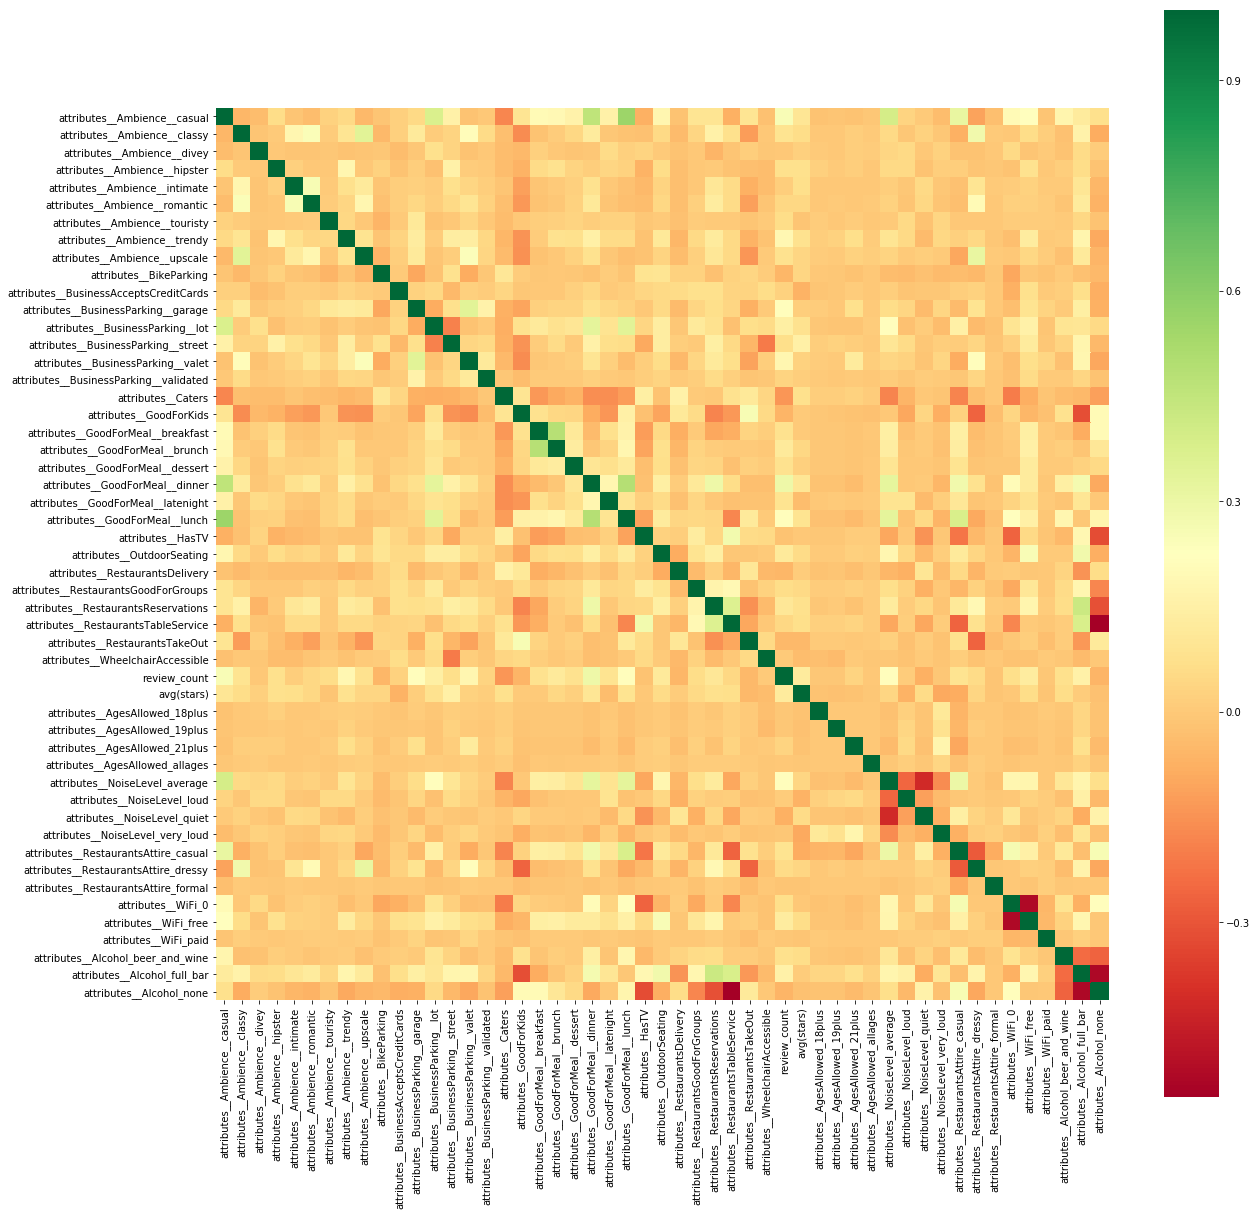

count    59774.000000
mean         3.476904
std          0.781863
min          1.000000
25%          3.000000
50%          3.560000
75%          4.030000
max          5.000000
Name: avg(stars), dtype: float64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

df = pd.DataFrame(df).round(2)
df['avg(stars)'].describe()

#df['avg(stars)'].unique()

In [3]:
# Split training data and test data
from sklearn.model_selection import train_test_split

target = df['avg(stars)'].values
data = df.drop('avg(stars)', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.35, random_state=42)

In [4]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

maes, r2s = [], []

for n in range(0,10):
    ridge = Ridge(alpha = n/10, normalize=True, solver='lsqr')
    ridge.fit(X_train, y_train)

    y_pred = ridge.predict(X_test)
    maes += [mean_absolute_error(y_test, y_pred)]
    r2s += [r2_score(y_test, y_pred)]

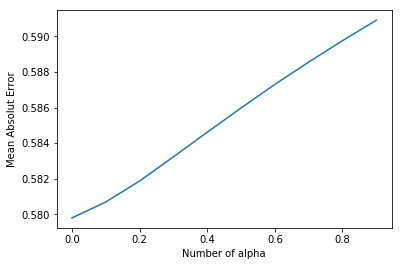

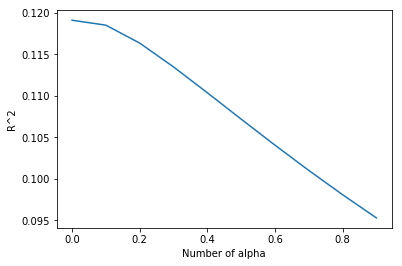

In [5]:
plt.plot([x/10 for x in range(0,10)], maes)
plt.xlabel('Number of alpha')
plt.ylabel('Mean Absolut Error')
plt.show()

plt.figure()
plt.plot([x/10 for x in range(0,10)], r2s)
plt.xlabel('Number of alpha')
plt.ylabel('R^2')
plt.show()

In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge(alpha=0, normalize=True, solver='lsqr')
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.5797921017843403
0.11909464846915574


In [7]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

reg_all = linear_model.LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)
cv_results = cross_val_score(reg_all,X_test,y_test,cv=5)

print(mean_absolute_error(y_test, y_pred))
print(np.mean(cv_results))

0.5798183239321583
0.11634388926395083


In [8]:
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
clf = tree.DecisionTreeRegressor(max_depth=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.5802848546249196
0.1149748551474532
